# Estimating the total number of marine phages
To estimate the total number of phages, we rely on a recent study which characterized the abundance of marine phages and prokaryotes globally [Wigington et al.](http://dx.doi.org/10.1038/nmicrobiol.2015.24). Here is a sample of the data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from scipy.stats import  gmean
from scipy.optimize import curve_fit
pd.options.display.float_format = '{:,.1e}'.format
data = pd.read_excel('marine_phage_data.xls')
data.head()

,OBS,DATE,Study,long,lat,DEPTH,BACTERIA,VIRUS
0,1,8/28/2000,ARCTICSBI,-1.0e+02,6.8e+01,1.0e+00,1.2e+05,2.4e+07
1,2,8/28/2000,ARCTICSBI,-1.0e+02,6.8e+01,1.0e+00,1.7e+05,2.4e+07
2,3,8/28/2000,ARCTICSBI,-1.0e+02,6.8e+01,1.0e+00,1.6e+05,1.5e+07
3,4,8/28/2000,ARCTICSBI,-1.0e+02,6.8e+01,1.0e+00,1.2e+05,1.6e+07
4,5,8/30/2000,ARCTICSBI,-1.0e+02,7.0e+01,1.0e+00,1.2e+05,1.3e+07


We bin the data based to ten depth bins so that each bin contains the same amount of data. The abundance of virions seems to follow an exponential deacy with depth:

[ -0.4940688   17.61664779]


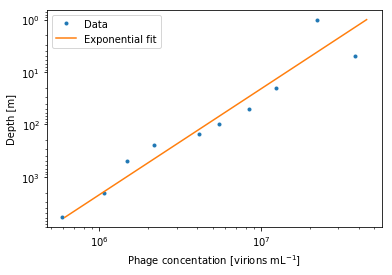

In [2]:
# Bin data to 10 depth bins with equal data
data['Depth_bin_equal'], bins = pd.qcut(data['DEPTH'], 10, retbins=True)

# Group data by depth bins
binned_data = data.groupby('Depth_bin_equal')

# Calculate arithmetic and geometric means for each depth bin
depth_bins_mean = binned_data['VIRUS'].aggregate(np.mean)

def func(x,a,b):
    return a*x+b

popt, pcov = curve_fit(func, np.log(bins[1:]), np.log(depth_bins_mean))
print(popt)
# Plot mean virion concentrations 
plt.loglog(depth_bins_mean,bins[1:],'.',label='Data')
plt.loglog(np.exp(func(np.log(bins[1:]),*popt)),bins[1:],label='Exponential fit')
plt.gca().invert_yaxis()
plt.xlabel(r'Phage concentation [virions mL$^{-1}$]')
plt.ylabel(r'Depth [m]')
plt.legend()

We calculate the total number of virions by multiplying the average concentration of virions in each depth bin by the total volume of each depth bin:

In [3]:
# Ocean surface area in m^2
ocean_surface_area = 3.6e14

# m^3 in mL
ml_m3_conv = 1e6

# Multiply mean concentrations by the total volume at each depth bin and sum over all bins
total_phage_mean = (depth_bins_mean*np.diff(bins)*ml_m3_conv*ocean_surface_area).sum()

print('Our best estimate for the total number of marine phages is %.0e' %total_phage_mean)

old_results = pd.read_excel('../phage_num_estimate.xlsx')
result = old_results.copy()
result.loc[0] = pd.Series({
                'Parameter': 'Total number of marine phages',
                'Value': total_phage_mean,
                'Units': 'Number of individuals',
                'Uncertainty': np.nan
                })

result.to_excel('../phage_num_estimate.xlsx',index=False)


Our best estimate for the total number of marine phages is 2e+30
